In [154]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [155]:
df = pd.read_csv('rawdata.csv',encoding ='latin1',low_memory=False)
df.info()
#df.sample(6,random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MSOA11CD                      983 non-null    object 
 1   MSOA11NM                      983 non-null    object 
 2   Local authority               983 non-null    object 
 3   covid_19_deaths               983 non-null    int64  
 4   covid_19_deaths_per_thousand  983 non-null    float64
 5   over_70_prop                  983 non-null    float64
 6   proportion_at_risk_jobs       983 non-null    float64
 7   insecure_proportion           983 non-null    float64
 8   all_bame_prop                 983 non-null    float64
 9   child_poverty_prop            983 non-null    float64
 10  Hypertension_prop             983 non-null    float64
 11  Obesity_prop                  983 non-null    float64
 12  Diabetes_prop                 983 non-null    float64
 13  Asthm

In [156]:
rawdata = pd.read_csv('rawdata.csv')

In [157]:
print(rawdata.columns.values)

['MSOA11CD' 'MSOA11NM' 'Local authority' 'covid_19_deaths'
 'covid_19_deaths_per_thousand' 'over_70_prop' 'proportion_at_risk_jobs'
 'insecure_proportion' 'all_bame_prop' 'child_poverty_prop'
 'Hypertension_prop' 'Obesity_prop' 'Diabetes_prop' 'Asthma_prop'
 'CAD_prop']


In [158]:
rawdata.head()

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,over_70_prop,proportion_at_risk_jobs,insecure_proportion,all_bame_prop,child_poverty_prop,Hypertension_prop,Obesity_prop,Diabetes_prop,Asthma_prop,CAD_prop
0,E02000001,City of London 001,City of London,3,0.344590,0.123593,0.120794,0.077743,0.213695,0.052592,0.0795,0.0362,0.0270,0.0308,0.0150
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,0.103886,0.345813,0.318841,0.350111,0.273855,0.0926,0.0615,0.0499,0.0391,0.0188
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,0.085965,0.309099,0.260850,0.453858,0.246672,0.1033,0.0760,0.0579,0.0464,0.0183
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,0.124658,0.311407,0.265570,0.190230,0.201967,0.0934,0.0836,0.0495,0.0358,0.0193
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,0.066282,0.337135,0.322392,0.337304,0.231935,0.0937,0.0879,0.0515,0.0426,0.0147


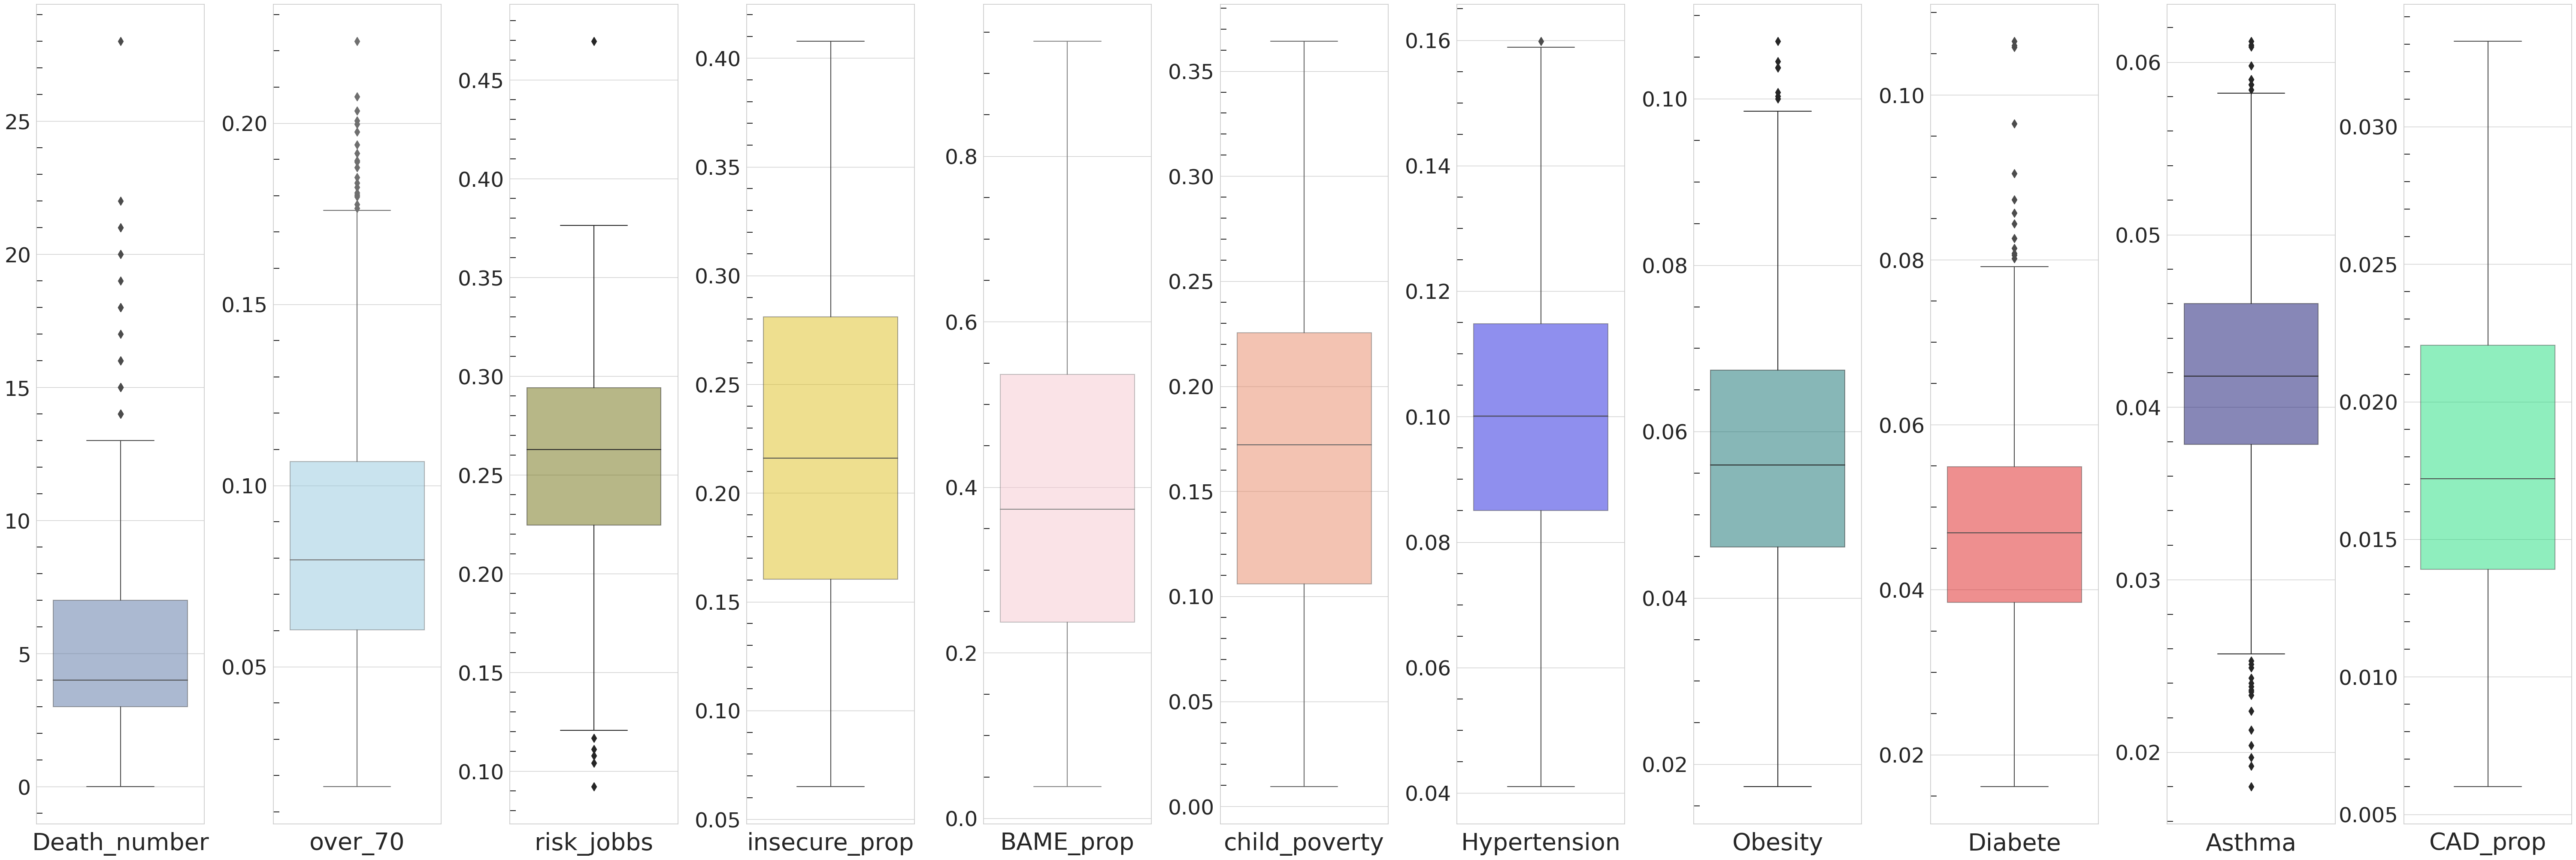

In [159]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(1,11, figsize=(60, 20))
sns.boxplot(y="covid_19_deaths",ax=ax[0],data= rawdata,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Death_number', ylabel='')
sns.boxplot(y="over_70_prop",ax=ax[1],color="skyblue",data= rawdata,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='over_70', ylabel='')
sns.boxplot(y="proportion_at_risk_jobs",ax=ax[2],color="olive",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='risk_jobs', ylabel='')
sns.boxplot(y="insecure_proportion",ax=ax[3],color="gold",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='insecure_prop', ylabel='')
sns.boxplot(y="all_bame_prop",ax=ax[4],color="pink",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='BAME_prop', ylabel='')
sns.boxplot(y="child_poverty_prop",ax=ax[5],color="coral",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='child_poverty', ylabel='')
sns.boxplot(y="Hypertension_prop",ax=ax[6],color="blue",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Hypertension', ylabel='')
sns.boxplot(y="Obesity_prop",ax=ax[7],color="teal",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Obesity', ylabel='')
sns.boxplot(y="Diabetes_prop",ax=ax[8],color="red",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Diabete', ylabel='')
sns.boxplot(y="Asthma_prop",ax=ax[9],color="navy",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='Asthma', ylabel='')
sns.boxplot(y="CAD_prop",ax=ax[10],color="springgreen",data= rawdata ,boxprops=dict(alpha=.5),fliersize=10).set(xlabel='CAD', ylabel='')


ax[0].set_xlabel(xlabel='Death_number', size=40)
ax[1].set_xlabel(xlabel='over_70', size=40)
ax[2].set_xlabel(xlabel='risk_jobbs', size=40)
ax[3].set_xlabel(xlabel='insecure_prop', size=40)
ax[4].set_xlabel(xlabel='BAME_prop', size=40)
ax[5].set_xlabel(xlabel='child_poverty', size=40)
ax[6].set_xlabel(xlabel='Hypertension', size=40)
ax[7].set_xlabel(xlabel='Obesity', size=40)
ax[8].set_xlabel(xlabel='Diabete', size=40)
ax[9].set_xlabel(xlabel='Asthma', size=40)
ax[10].set_xlabel(xlabel='CAD_prop', size=40)

#plt.xticks(fontsize=14, rotation=90)

for x in range(11):
    ax[x].tick_params(axis='both', which='major', labelsize=35)
    ax[x].tick_params(axis='both',  direction="in",left=True, which='minor',length=10,width=1.5)
    ax[x].minorticks_on()
f.tight_layout(pad=0.5)

plt.savefig('boxplots.png',dpi=300)


In [160]:
# droping outliniers 
from scipy import stats
print(rawdata.shape)


z = np.abs(stats.zscore(rawdata.covid_19_deaths))
threshold = 3
print(np.where(z > 3))
cleandata = rawdata[(z < 3)]
print(cleandata.shape)

(983, 15)
(array([ 36,  76,  95, 114, 240, 259, 272, 288, 364, 417, 418, 478, 552,
       690, 863]),)
(968, 15)


In [194]:
cleandata.reset_index(drop=True, inplace=True)
print(cleandata)

      MSOA11CD                  MSOA11NM       Local authority  \
0    E02000001        City of London 001        City of London   
1    E02000002  Barking and Dagenham 001  Barking and Dagenham   
2    E02000003  Barking and Dagenham 002  Barking and Dagenham   
3    E02000004  Barking and Dagenham 003  Barking and Dagenham   
4    E02000005  Barking and Dagenham 004  Barking and Dagenham   
..         ...                       ...                   ...   
963  E02006927             Greenwich 034             Greenwich   
964  E02006928             Greenwich 035             Greenwich   
965  E02006929             Greenwich 036             Greenwich   
966  E02006930             Greenwich 037             Greenwich   
967  E02006931             Greenwich 038             Greenwich   

     covid_19_deaths  covid_19_deaths_per_thousand  over_70_prop  \
0                  3                      0.344590      0.123593   
1                  2                      0.259067      0.103886   
2  

In [197]:
print(cleandata.columns.values)

['MSOA11CD' 'MSOA11NM' 'Local authority' 'covid_19_deaths'
 'covid_19_deaths_per_thousand' 'over_70_prop' 'proportion_at_risk_jobs'
 'insecure_proportion' 'all_bame_prop' 'child_poverty_prop'
 'Hypertension_prop' 'Obesity_prop' 'Diabetes_prop' 'Asthma_prop'
 'CAD_prop']


In [203]:
cleandata.head()

,MSOA11CD,MSOA11NM,Local authority,covid_19_deaths,covid_19_deaths_per_thousand,over_70_prop,proportion_at_risk_jobs,insecure_proportion,all_bame_prop,child_poverty_prop,Hypertension_prop,Obesity_prop,Diabetes_prop,Asthma_prop,CAD_prop
0,E02000001,City of London 001,City of London,3,0.344590,0.123593,0.120794,0.077743,0.213695,0.052592,0.0795,0.0362,0.0270,0.0308,0.0150
1,E02000002,Barking and Dagenham 001,Barking and Dagenham,2,0.259067,0.103886,0.345813,0.318841,0.350111,0.273855,0.0926,0.0615,0.0499,0.0391,0.0188
2,E02000003,Barking and Dagenham 002,Barking and Dagenham,3,0.271469,0.085965,0.309099,0.260850,0.453858,0.246672,0.1033,0.0760,0.0579,0.0464,0.0183
3,E02000004,Barking and Dagenham 003,Barking and Dagenham,9,1.366535,0.124658,0.311407,0.265570,0.190230,0.201967,0.0934,0.0836,0.0495,0.0358,0.0193
4,E02000005,Barking and Dagenham 004,Barking and Dagenham,5,0.488806,0.066282,0.337135,0.322392,0.337304,0.231935,0.0937,0.0879,0.0515,0.0426,0.0147


In [205]:
df_cleandata=cleandata.drop(['MSOA11CD','MSOA11NM','Local authority','covid_19_deaths_per_thousand'],axis=1)
df_cleandata

,covid_19_deaths,over_70_prop,proportion_at_risk_jobs,insecure_proportion,all_bame_prop,child_poverty_prop,Hypertension_prop,Obesity_prop,Diabetes_prop,Asthma_prop,CAD_prop
0,3,0.123593,0.120794,0.077743,0.213695,0.052592,0.0795,0.0362,0.0270,0.0308,0.0150
1,2,0.103886,0.345813,0.318841,0.350111,0.273855,0.0926,0.0615,0.0499,0.0391,0.0188
2,3,0.085965,0.309099,0.260850,0.453858,0.246672,0.1033,0.0760,0.0579,0.0464,0.0183
3,9,0.124658,0.311407,0.265570,0.190230,0.201967,0.0934,0.0836,0.0495,0.0358,0.0193
4,5,0.066282,0.337135,0.322392,0.337304,0.231935,0.0937,0.0879,0.0515,0.0426,0.0147
...,...,...,...,...,...,...,...,...,...,...,...
963,9,0.115153,0.261317,0.206831,0.290559,0.139949,0.1128,0.0532,0.0419,0.0471,0.0204
964,1,0.022404,0.231257,0.183848,0.414249,0.201701,0.0671,0.0396,0.0303,0.0393,0.0103
965,5,0.044862,0.225935,0.181297,0.379706,0.135366,0.0714,0.0389,0.0305,0.0364,0.0139
966,2,0.052313,0.207739,0.147403,0.220850,0.106052,0.0829,0.0384,0.0317,0.0363,0.0145


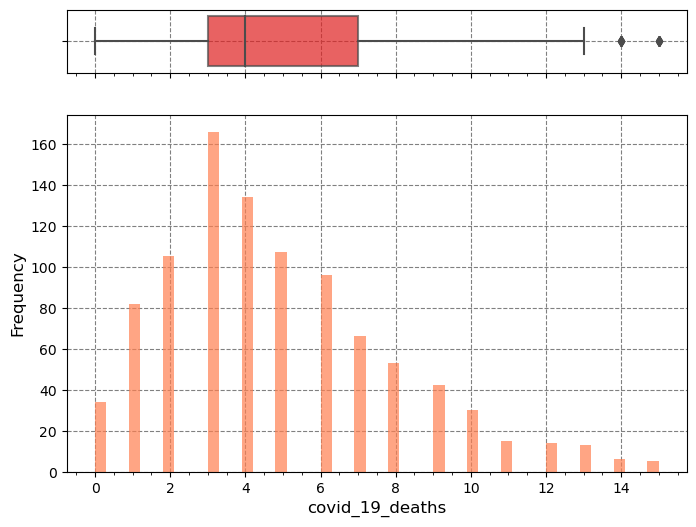

In [212]:
plt.rcParams.update(plt.rcParamsDefault)

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
data = cleandata['covid_19_deaths']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(8,6))
 
# Add a graph in each part
sns.boxplot(data, ax=ax_box,color="Red",boxprops=dict(alpha=.7))
plt.hist(data, bins=50,color="Coral", alpha=0.7)

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

#Figure characteristics

## place a text box in bottom right in axes coords
#ax_hist.text(0.51, 0.05, title, transform=ax.transAxes, fontsize=11,
        #verticalalignment='bottom', bbox=props2)

plt.ylabel('Frequency', fontsize=12)
plt.xlabel("covid_19_deaths",fontsize=12)
ax_hist.xaxis.set_minor_locator(AutoMinorLocator())
ax_hist.set_axisbelow(True)
ax_hist.grid(color='gray', linestyle='dashed')
ax_box.set_axisbelow(True)
ax_box.grid(color='gray', linestyle='dashed')
#f.savefig("histogram_changefirst5")

In [163]:
#MLR
death_number = cleandata.loc[:,['covid_19_deaths','over_70_prop','proportion_at_risk_jobs','insecure_proportion','all_bame_prop','child_poverty_prop','Hypertension_prop','Obesity_prop','Diabetes_prop','Asthma_prop','CAD_prop']]
multiple_linear_regression = sms.formula.ols('covid_19_deaths ~ over_70_prop + proportion_at_risk_jobs + insecure_proportion + all_bame_prop + child_poverty_prop + Hypertension_prop + Obesity_prop + Diabetes_prop + Asthma_prop + CAD_prop', death_number).fit()
multiple_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     19.13
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           2.41e-32
Time:                        23:26:24   Log-Likelihood:                -2373.9
No. Observations:                 968   AIC:                             4770.
Df Residuals:                     957   BIC:                             4823.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.1383      0.786     -0.176      0.860      -1.681       1.405
over_70_prop               31.3141      5.235      5.981      0.000      21.040      41.588
proportion_at_risk_jobs    -9.7529      4.381     -2.226      0.026     -18.351      -1.155
insecure_proportion         6.4053      3.491      1.835      0.067      -0.445      13.256
all_bame_prop               4.4017      1.118      3.937      0.000       2.208       6.596
child_poverty_prop          1.5894      2.432      0.654      0.514      -3.183       6.362
Hypertension_prop          -2.8996     11.950     -0.243      0.808     -26.350      20.551
Obesity_prop               10.3582      9.675      1.071      0.285      -8.628      29.344
Diabetes_prop              35.2533     20.333      1.734      0.083      -4.649      75.155
Asthma_prop                 1.4463     19.166      0.075      0.940     -36.166      39.059
CAD_prop                  -38.7624     44.762     -0.866      0.387    -126.605      49.080
==============================================================================
Omnibus:                       81.257   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.723
Skew:                           0.742   Prob(JB):                     1.34e-22
Kurtosis:                       3.543   Cond. No.                         587.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
#reduce p>0.05 

death_number_new = cleandata.loc[:,['covid_19_deaths','over_70_prop','proportion_at_risk_jobs','all_bame_prop','Diabetes_prop']]
multiple_linear_regression_new = sms.formula.ols('covid_19_deaths ~ over_70_prop + proportion_at_risk_jobs + all_bame_prop + Diabetes_prop', death_number_new).fit()
multiple_linear_regression_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           1.10e-34
Time:                        23:26:24   Log-Likelihood:                -2379.1
No. Observations:                 968   AIC:                             4768.
Df Residuals:                     963   BIC:                             4793.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.6200      0.577     -1.075      0.283      -1.752       0.512
over_70_prop               23.0497      3.615      6.376      0.000      15.955      30.144
proportion_at_risk_jobs    -0.5340      2.222     -0.240      0.810      -4.894       3.826
all_bame_prop               5.0186      0.855      5.872      0.000       3.341       6.696
Diabetes_prop              33.9481     11.958      2.839      0.005      10.482      57.414
==============================================================================
Omnibus:                       76.743   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.909
Skew:                           0.718   Prob(JB):                     4.05e-21
Kurtosis:                       3.516   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
#reduce p>0.05 secondtime 

death_number_final = cleandata.loc[:,['covid_19_deaths','over_70_prop','all_bame_prop','Diabetes_prop']]
multiple_linear_regression_final = sms.formula.ols('covid_19_deaths ~ over_70_prop + all_bame_prop + Diabetes_prop', death_number_final).fit()
multiple_linear_regression_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        covid_19_deaths   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     60.06
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           1.34e-35
Time:                        23:26:24   Log-Likelihood:                -2379.1
No. Observations:                 968   AIC:                             4766.
Df Residuals:                     964   BIC:                             4786.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7095      0.440     -1.613      0.107      -1.573       0.154
over_70_prop     23.2113      3.550      6.538      0.000      16.244      30.179
all_bame_prop     5.0320      0.852      5.903      0.000       3.359       6.705
Diabetes_prop    32.5384     10.415      3.124      0.002      12.099      52.978
==============================================================================
Omnibus:                       76.849   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.082
Skew:                           0.718   Prob(JB):                     3.72e-21
Kurtosis:                       3.518   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

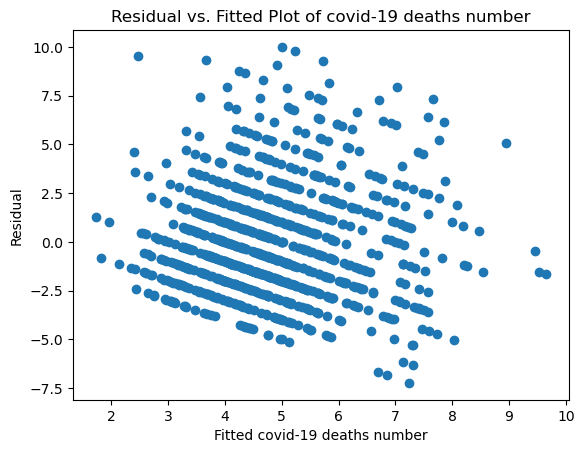

In [166]:
# plot 
plt.scatter(multiple_linear_regression_final.fittedvalues, multiple_linear_regression_final.resid)
# adding title and labels
plt.xlabel('Fitted covid-19 deaths number')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of covid-19 deaths number')
plt.show()

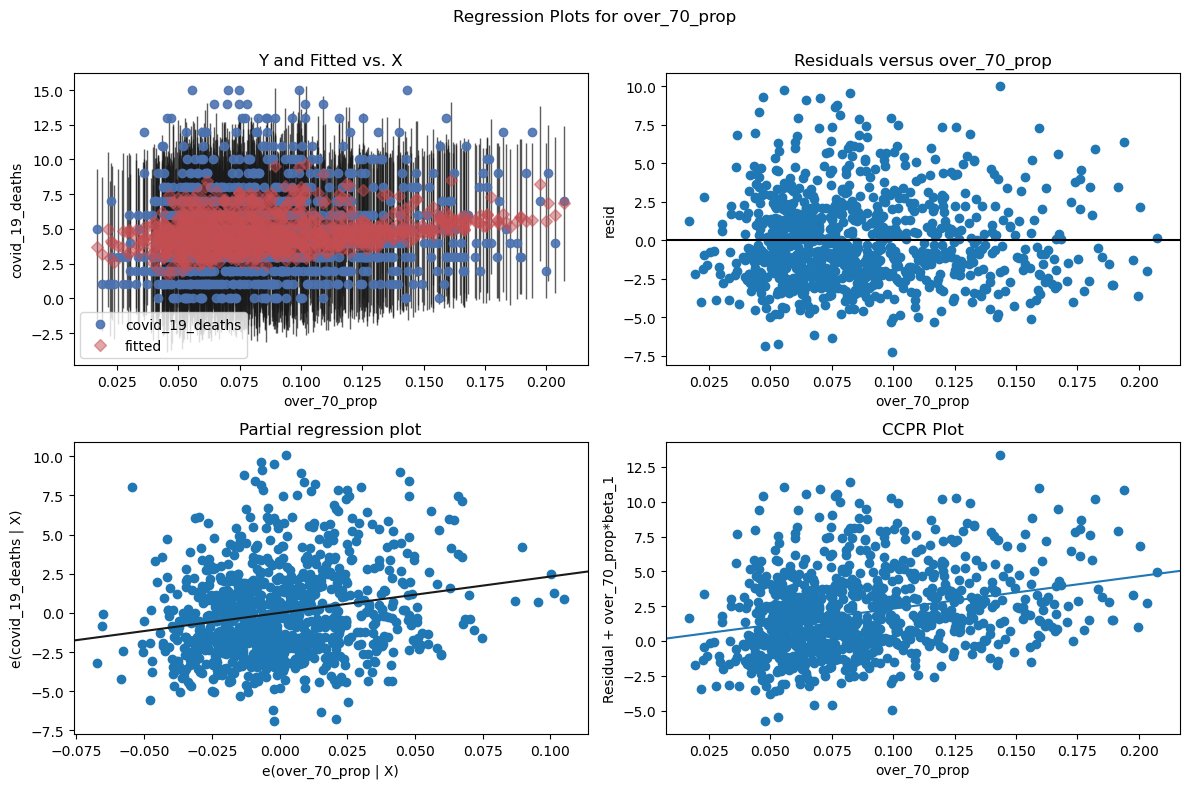

In [167]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multiple_linear_regression_final, 'over_70_prop', fig=fig)

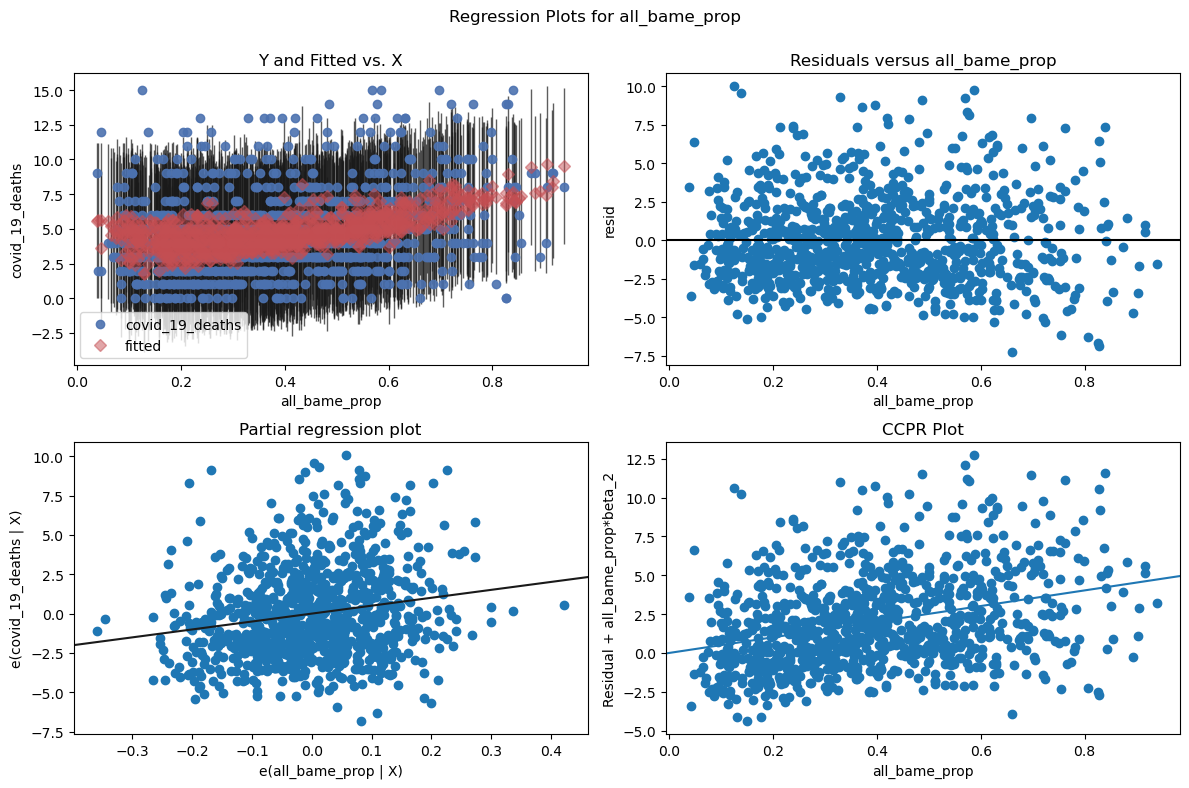

In [168]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multiple_linear_regression_final, 'all_bame_prop', fig=fig)

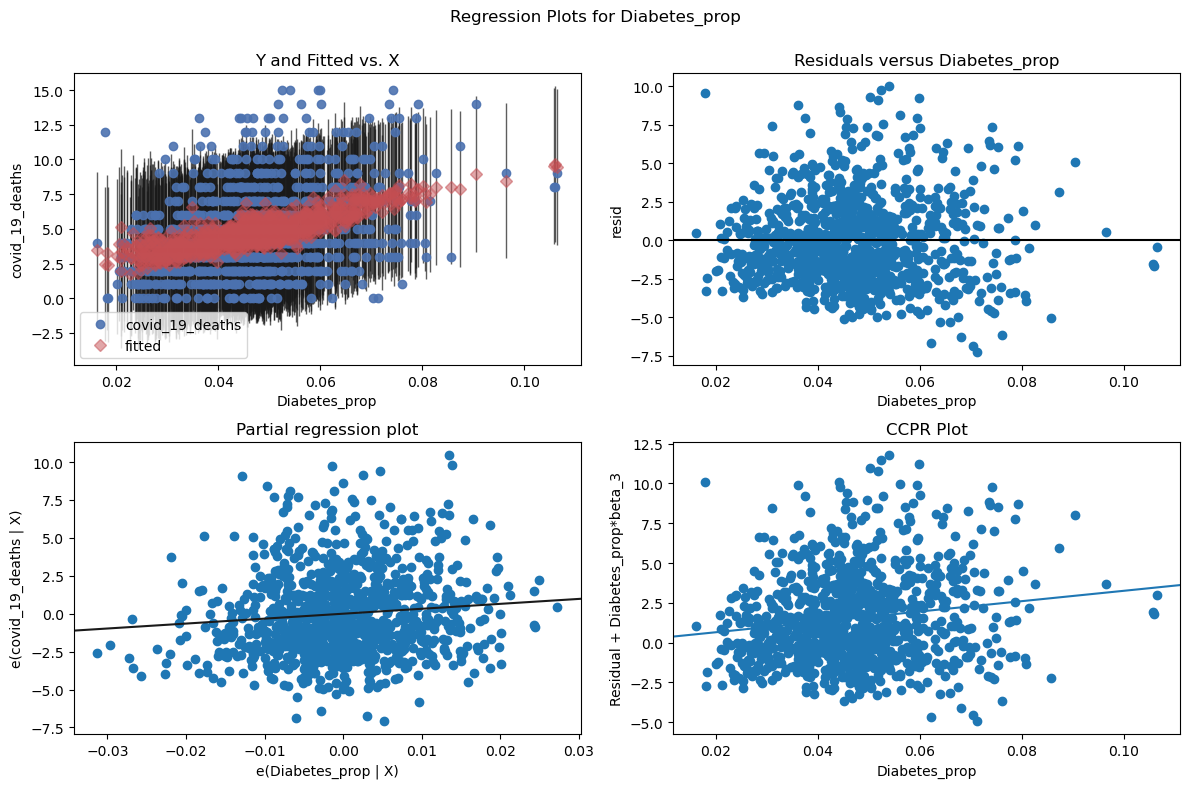

In [169]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(multiple_linear_regression_final, 'Diabetes_prop', fig=fig)